In [1]:
'''
This code is a minimal failing example of multicam (with scatter) 
'''

import numpy as np
import matplotlib.pyplot as plt
import time
from multicam.models import MultiCAM
from multicam.models import MultiCamSampling
#from multicam.models import get_tt_indices



In [2]:


# PLOTTING
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['text.usetex'] = True

plot_dir = '.'


In [3]:

# LISTS OF DATA
Halo_names_ = ['Halo156', 'Halo175', 'Halo200', 'Halo211', 'Halo213', 'Halo222', 'Halo225', 'Halo266', 'Halo274', 'Halo277', 'Halo282', 'Halo293', 'Halo304', 'Halo306', 'Halo308', 'Halo317', 'Halo321', 'Halo324', 'Halo326', 'Halo335', 'Halo337', 'Halo339', 'Halo345', 'Halo346', 'Halo348', 'Halo349', 'Halo352', 'Halo354', 'Halo358', 'Halo360', 'Halo361', 'Halo366', 'Halo367', 'Halo377', 'Halo378', 'Halo385', 'Halo386', 'Halo387', 'Halo390', 'Halo391', 'Halo394', 'Halo400', 'Halo407', 'Halo409', 'Halo415', 'Halo428', 'Halo437', 'Halo441', 'Halo445', 'Halo447', 'Halo448', 'Halo454', 'Halo455', 'Halo461', 'Halo472', 'Halo474', 'Halo475', 'Halo476', 'Halo478', 'Halo479', 'Halo480', 'Halo483', 'Halo489', 'Halo494', 'Halo502', 'Halo517', 'Halo522', 'Halo544', 'Halo545', 'Halo561', 'Halo572', 'Halo574', 'Halo600', 'Halo629', 'Halo639', 'Halo645', 'Halo734', 'Halo372', 'Halo425']
x_ = [1.5501838255183915, 1.429580270294203, 1.1313887267190184, 0.9060197627941365, 1.424530620930026, 1.6142490105165934, 1.3492989579254762, 1.0911960310566513, 1.5447081730268573, 1.1916561169291584, 1.0682729630313796, 1.4562429346084955, 1.1675403735558365, 1.3989985177020383, 1.3251152445162988, 0.920743055278221, 1.0372320561662034, 1.3023886928314021, 1.7339923060949407, 1.3023886928314021, 1.392413564118935, 0.8477753668964162, 1.2134041649826148, 1.3572799893972607, 1.424530620930026, 1.2962584725481516, 1.1287229162741974, 1.2770358207629782, 1.3492989579254762, 1.56611165212481, 1.2665353433738846, 1.2024809751130578, 1.4933509395836566, 1.187446877561347, 1.2336075337601706, 1.6862573768458904, 1.3989985177020383, 1.649536084260498, 1.2336075337601706, 1.1119847054613239, 1.0335682827483974, 1.1602187917460578, 1.3204345927956682, 1.6789803148240734, 0.6907480229231615, 1.3739240306780598, 1.5859399710162363, 1.5840704505751848, 1.90933045955872, 1.4505286919821363, 1.357813733566572, 1.5027747578778052, 0.9836137215347089, 1.421732971415724, 1.2336075337601706, 1.1813931000695357, 1.4810718026008662, 0.8325805456242604, 1.212450396302958, 1.3023886928314021, 0.9471799715493888, 0.936073570890409, 1.299319967380482, 1.1176828155829788, 0.9999910435551217, 0.9024645752455193, 1.0376399429445589, 0.951659341980863, 1.5840704505751848, 1.3951535196588885, 1.4335201473502786, 1.9457056370016337, 1.2258716484030951, 0.9956755713471819, 1.7408232311252652, 1.1977624848927264, 0.7324222226916263, 1.3023886928314021, 0.9859368140268785]
y_ = [0.7045930536090441, 0.38765918209560013, 0.330210444994238, 0.3564008664691025, 0.3868582012128961, 0.29635654756069485, 0.661385866185841, 0.23727363856590283, 0.4913832655233903, 0.18660635380908197, 0.26650216663612925, 0.47394936887388345, 0.5000741381328877, 0.40663098542403636, 0.36654903277758644, 0.19440765390669884, 0.21792961347286519, 0.36125892508563495, 0.7136468924989667, 0.38051180904502135, 0.5174368275156878, 0.08321700748757783, 0.5156106367238303, 0.5277644672312033, 0.5918018703428721, 0.35516109355615266, 0.3990959580460967, 0.31117959970014075, 0.4690721874155518, 0.36748543020310226, 0.48788529158550786, 0.38444768786606703, 0.4913660399551242, 0.3720234030317838, 0.5293523693678018, 0.6410536287982285, 0.5217455833685405, 0.7105263119395334, 0.5380857889710835, 0.4570625043644608, 0.18296858762761362, 0.5897198821676661, 0.704393788521892, 0.3344065742762344, 0.1655530888301537, 0.3649162122673584, 0.8133402032470254, 0.617356042130301, 0.5899246663027216, 0.3355631806224172, 0.5309787395768472, 0.4994397747307873, 0.30057538734382583, 0.6888489193437126, 0.33240006888966134, 0.5300527712399742, 0.4830650974239619, 0.12248577147707299, 0.41940038279964603, 0.3275190558697829, 0.13969164942331067, 0.35174169967972363, 0.26476878655835884, 0.15172080375694794, 0.311367385946887, 0.19870129860225966, 0.3743547225403731, 0.41524309915474467, 0.5750653919392112, 0.13998411248239978, 0.7535383274836613, 0.8262542219874918, 0.4091221072017615, 0.3905549660815153, 0.6026080980587093, 0.444711993845511, 0.13755017195783567, 0.36714904121024944, 0.20981041966243885]
# ARRAYS OF DATA
Halo_names = np.array(Halo_names_)
x = np.array(x_) # FEATURE (Rsp at present day)
y = np.array(y_) # TARGET (m(a=0.60))



In [4]:


# INITIALIZE MULTICAM 
mv_model2 = MultiCamSampling(1, 1)
test_Halo1 = 'Halo400'
test_Halo2 = 'Halo517'

train_mask = (Halo_names != test_Halo1)&(Halo_names != test_Halo2)
test_mask = ~train_mask
x_train = x[train_mask]
x_test = x[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]


In [5]:
# FIT AND SAMPLE MULTICAM MODEL
mv_model2.fit(np.array([x_train]).T, np.array([y_train]).T)

In [7]:

# n_samples = 20
# print(np.shape(x_test))

# y_samples = mv_model2.sample(np.array([x_test]).T, n_samples)
# #y_samples = mv_model2.sample(x_test, n_samples)

# print("y_samples",y_samples)


In [8]:
# SAMPLE MULTICAM MODEL
n_samples = 20

y_samples = []
for ii in range(n_samples):
    y_sample = mv_model2.sample(np.array([x_test]).T)
    y_samples.append(y_sample)
y_samples = np.array(y_samples)

# y_samples = mv_model2.sample(np.array([x_test]).T)
y_samples.shape

(20, 2, 1)

In [9]:
# print("y_samples",y_samples)

In [10]:

# y_samples = mv_model2.sample(np.array([x_test]).T, n_samples)
# #y_samples = mv_model2.sample(x_test, n_samples)



In [11]:
y_test.shape

(2,)

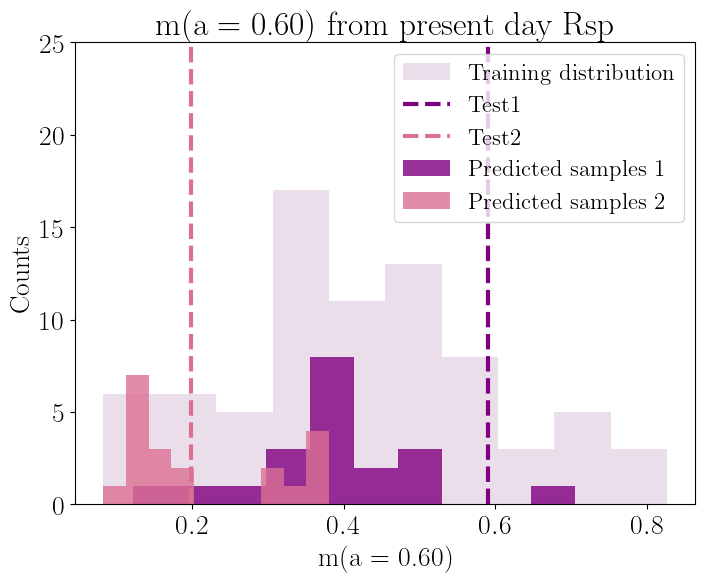

In [12]:

# PLOT
fig, ax = plt.subplots(1,1,figsize = (8,6))
Color1 = "purple"
Color2 = "palevioletred"
ax.set_xlabel('m(a = 0.60)')
ax.set_ylabel('Counts')
ax.set_ylim(0,25)
ax.set_title('m(a = 0.60) from present day Rsp')
ax.hist(y_train, color = 'thistle', alpha = .5, label = "Training distribution")
ax.axvline(y_test[0], color = Color1, alpha = 1, lw = 3, ls = '--', label = "Test1")
ax.axvline(y_test[1], color = Color2, alpha = 1, lw = 3, ls = '--', label = "Test2")
ax.hist(y_samples[:, 0, :], alpha = .8, color = Color1, label = "Predicted samples 1")
ax.hist(y_samples[:, 1, :], alpha = .8, color = Color2, label = "Predicted samples 2")
ax.legend()
fig.savefig(plot_dir+"MAH_multicam_samples_test.png")
